<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/Hemo_Recount.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
hemo = pd.read_csv('/content/drive/MyDrive/Thesis Project Kidney/Hemodialysis.csv', encoding='latin1')
hemo.head()

,PatientUID,PatientvisitUID,ENTY,OrderDttm,ItemName
0,1634972,1838715,InPatient,38:00.0,ãªéäµà·ÕÂÁ (Hemodialysis) - Chronic Hemodialy...
1,1681750,1838753,InPatient,16:00.0,ãªéäµà·ÕÂÁ (Hemodialysis) - Chronic Hemodialy...
2,1681750,1838753,InPatient,22:00.0,ãªéäµà·ÕÂÁ (Hemodialysis) - Chronic Hemodialy...
3,1681750,1838753,InPatient,23:00.0,ãªéäµà·ÕÂÁ (Hemodialysis) - Chronic Hemodialy...
4,1681750,1838753,InPatient,44:00.0,ãªéäµà·ÕÂÁ (Hemodialysis) - Chronic Hemodialy...


In [3]:
hemo.shape

(149987, 5)

In [4]:
import pandas as pd
lab = pd.read_csv('/content/drive/MyDrive/Thesis Project Kidney/Lab.csv')
lab.shape

(21641523, 11)

In [5]:
import pandas as pd
vital = pd.read_csv('/content/drive/MyDrive/Thesis Project Kidney/vitalsign.csv')
vital.shape

(9213497, 7)

In [6]:
import pandas as pd
diagnosis = pd.read_csv('/content/drive/MyDrive/Thesis Project Kidney/Diagnosis.csv')
diagnosis.shape

(2357574, 7)

In [7]:
import pandas as pd
prescription = pd.read_csv('/content/drive/MyDrive/Thesis Project Kidney/Prescription.csv')
prescription.shape

(9530452, 10)

In [8]:
import pandas as pd
visit = pd.read_csv('/content/drive/MyDrive/Thesis Project Kidney/Visit.csv')
visit.shape

<ipython-input-8-f9e16e8e2b41>:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  visit = pd.read_csv('/content/drive/MyDrive/Thesis Project Kidney/Visit.csv')


(1340588, 11)

In [9]:
# Create a list from hemo['PatientUID']
patient_uid_list = hemo['PatientUID'].unique().tolist()

In [10]:
# Remove patient UIDs from lab['PatientUID'] that are not in the list
lab = lab[~lab['PatientUID'].isin(patient_uid_list)]
lab.shape

(17728574, 11)

In [11]:
# Remove patient UIDs from visit['PatientUID'] that are not in the list
visit = visit[~visit['PatientUID'].isin(patient_uid_list)]
visit.shape

(1195332, 11)

In [12]:
# Remove patient UIDs from visit['PatientUID'] that are not in the list
vital = vital[~vital['PatientUID'].isin(patient_uid_list)]
vital.shape

(8099274, 7)

In [13]:
# Remove patient UIDs from visit['PatientUID'] that are not in the list
diagnosis = diagnosis[~diagnosis['PatientUID'].isin(patient_uid_list)]
diagnosis.shape

(2081658, 7)

In [14]:
# Remove patient UIDs from visit['PatientUID'] that are not in the list
prescription = prescription[~prescription['PatientUID'].isin(patient_uid_list)]
prescription.shape

(7845039, 10)

> **ตัดผู้ป่วยโรคไตออกแล้วในทุกไฟล์**



##🗂️Import data: vitalsign

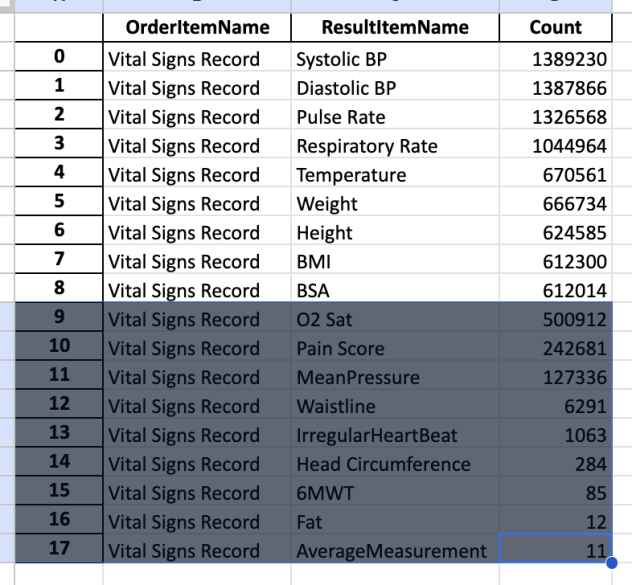

In [15]:
vital

,LabNo,PatientUID,PatientVisitUID,OrderItemName,ResultItemName,ResultValue,CWhen
0,1,24513,2140458,Vital Signs Record,Weight,76.7,2558-04-08 09:57:59.153
1,1,24513,2341133,Vital Signs Record,BMI,30.76,2558-07-01 09:20:02.617
2,1,24513,2341133,Vital Signs Record,Pulse Rate,98,2558-07-01 09:20:02.617
3,1,24513,2341133,Vital Signs Record,Respiratory Rate,20,2558-07-01 09:20:02.617
4,1,24513,2388152,Vital Signs Record,BMI,30.36,2558-07-22 10:04:54.377
...,...,...,...,...,...,...,...
9213492,1,3437526,10261871,Vital Signs Record,MeanPressure,82,2566-01-16 11:41:03.323
9213493,1,3437526,10261871,Vital Signs Record,Systolic BP,141,2566-01-16 11:41:03.323
9213494,1,3437526,10191122,Vital Signs Record,Respiratory Rate,22,2565-12-26 07:41:11.367
9213495,1,3437526,10191122,Vital Signs Record,Systolic BP,155,2565-12-26 07:41:11.367


### 🔎UniqueValues
columns: **OrderItemName and ResultItemName** in vitalsign.csv

In [16]:
# Specify the columns for unique value counting
columns_to_count = ['OrderItemName', 'ResultItemName']

# Count unique values in the specified columns
unique_counts = vital[columns_to_count].value_counts().reset_index()

In [17]:
unique_counts.columns = ['OrderItemName','ResultItemName', 'Count']
unique_counts

,OrderItemName,ResultItemName,Count
0,Vital Signs Record,Systolic BP,1221173
1,Vital Signs Record,Diastolic BP,1220095
2,Vital Signs Record,Pulse Rate,1162366
3,Vital Signs Record,Respiratory Rate,913355
4,Vital Signs Record,Weight,601412
5,Vital Signs Record,Height,568598
6,Vital Signs Record,Temperature,565336
7,Vital Signs Record,BMI,558791
8,Vital Signs Record,BSA,558502
9,Vital Signs Record,O2 Sat,404864


In [18]:
unique_counts['ResultItemName'].unique()

array(['Systolic BP', 'Diastolic BP', 'Pulse Rate', 'Respiratory Rate',
       'Weight', 'Height', 'Temperature', 'BMI', 'BSA', 'O2 Sat',
       'Pain Score', 'MeanPressure', 'Waistline', 'IrregularHeartBeat',
       'Head Circumference', '6MWT', 'AverageMeasurement', 'Fat'],
      dtype=object)

In [19]:
selected_items = ['Systolic BP', 'Diastolic BP', 'Pulse Rate', 'Respiratory Rate',
                  'Temperature', 'O2 Sat', 'Weight', 'Height', 'BSA']

filtered_items = unique_counts[unique_counts['ResultItemName'].isin(selected_items)]
filtered_items

,OrderItemName,ResultItemName,Count
0,Vital Signs Record,Systolic BP,1221173
1,Vital Signs Record,Diastolic BP,1220095
2,Vital Signs Record,Pulse Rate,1162366
3,Vital Signs Record,Respiratory Rate,913355
4,Vital Signs Record,Weight,601412
5,Vital Signs Record,Height,568598
6,Vital Signs Record,Temperature,565336
8,Vital Signs Record,BSA,558502
9,Vital Signs Record,O2 Sat,404864


In [20]:
vitalsign_df = pd.DataFrame(filtered_items)
vitalsign_df

,OrderItemName,ResultItemName,Count
0,Vital Signs Record,Systolic BP,1221173
1,Vital Signs Record,Diastolic BP,1220095
2,Vital Signs Record,Pulse Rate,1162366
3,Vital Signs Record,Respiratory Rate,913355
4,Vital Signs Record,Weight,601412
5,Vital Signs Record,Height,568598
6,Vital Signs Record,Temperature,565336
8,Vital Signs Record,BSA,558502
9,Vital Signs Record,O2 Sat,404864


##🗂️Import data: Diagnosis

In [21]:
diagnosis

,PatientUID,PatientVisitUID,ProblemCode,ProblemName,ProblemDescription,DIAGTYPE,OnsetDttm
0,22496,0,K922,"Gastrointestinal haemorrhage\, unspecified",เลือดออกในกระเพาะอาหารและลำไส้ ไม่ระบุรายละเอียด,PRINCIPAL DX (การวินิจฉัยโรคหลัก),2556-01-05 00:00:00.000
2,6629,0,K052,Acute periodontitis,โรคปริทันต์อักเสียบเฉียบพลัน,PRINCIPAL DX (การวินิจฉัยโรคหลัก),2556-01-05 00:00:00.000
3,22234,0,E112,Non-insulin-dependent diabetes mellitus type 2...,เบาหวานชนิดที่ไม่ต้องพึ่งอินซูลิน ร่วมกับภาวะแ...,PRINCIPAL DX (การวินิจฉัยโรคหลัก),2556-01-07 00:00:00.000
4,22234,0,N083,Glomerular disorders in diabetes mellitus ( E1...,ความผิดปกติของโกลเมอรูลัสในโรคเบาหวาน (E10-E14...,PRINCIPAL DX (การวินิจฉัยโรคหลัก),2556-01-07 00:00:00.000
5,22234,0,E789,"Disorder of lipoprotein metabolism\,unspecified",ความผิดปกติแบบอื่นของเมตะบอลิซึมของไลโปโปรตีน ...,PRINCIPAL DX (การวินิจฉัยโรคหลัก),2556-01-07 00:00:00.000
...,...,...,...,...,...,...,...
2357567,3328161,10578100,82049002,Squamous papillomatosis,NaN,PRINCIPAL DX (การวินิจฉัยโรคหลัก),2566-04-11 00:00:00.000
2357570,3004348,10577134,312104005,Cholangiocarcinoma of biliary tract,NaN,PRINCIPAL DX (การวินิจฉัยโรคหลัก),2566-04-11 00:00:00.000
2357571,3341752,10576249,128302006,Chronic hepatitis C,NaN,PRINCIPAL DX (การวินิจฉัยโรคหลัก),2566-04-11 00:00:00.000
2357572,3383466,10575890,56491003,Nephrolithiasis,NaN,PRINCIPAL DX (การวินิจฉัยโรคหลัก),2566-04-11 00:00:00.000


### 🔎**UniqueValues**
columns: **ProblemCode, ProblemName, and (ProblemCode,ProblemName)** in Diagnosis.csv

In [22]:
diag_code = diagnosis['ProblemCode'].value_counts().reset_index()
diag_code.columns = ['UniqueValue_CODE','Count']
diag_code

,UniqueValue_CODE,Count
0,370992007,124827
1,I10,90673
2,44054006,68739
3,1201005,66796
4,59621000,51308
...,...,...
18771,269095002,1
18772,312902008,1
18773,41801008,1
18774,H619,1


In [23]:
diag_name = diagnosis['ProblemName'].value_counts().reset_index()
diag_name.columns = ['UniqueValue_NAME','Count']
diag_name

,UniqueValue_NAME,Count
0,Dyslipidemia,124826
1,Essential (primary) hypertension,90673
2,Type 2 diabetes mellitus,68737
3,Benign essential hypertension,66802
4,Essential hypertension,52005
...,...,...
17751,Infantile hemiplegia,1
17752,"Influenza with other manifestations\, virus no...",1
17753,"Vascular complications following a procedure\,...",1
17754,Chronic instability of knee Multiple sites,1


In [24]:
# Specify the columns for unique value counting
columns_to_count = ['ProblemCode', 'ProblemName']

# Count unique values in the specified columns
diag_count = diagnosis[columns_to_count].value_counts().reset_index()
diag_count.columns = ['ProblemCode', 'ProblemName', 'Count']
diag_count

,ProblemCode,ProblemName,Count
0,370992007,Dyslipidemia,124826
1,I10,Essential (primary) hypertension,90673
2,44054006,Type 2 diabetes mellitus,68737
3,1201005,Benign essential hypertension,66796
4,59621000,Essential hypertension,51307
...,...,...,...
18914,31137003,"Early latent syphilis, positive serology, nega...",1
18915,311804006,Prolapsed lumbar intervertebral disc with scia...,1
18916,125587004,Superficial injury,1
18917,311892004,Collapse of vertebra due to osteoporosis NOS,1


In [25]:
diag_df = pd.DataFrame(diag_count)
diag_df

,ProblemCode,ProblemName,Count
0,370992007,Dyslipidemia,124826
1,I10,Essential (primary) hypertension,90673
2,44054006,Type 2 diabetes mellitus,68737
3,1201005,Benign essential hypertension,66796
4,59621000,Essential hypertension,51307
...,...,...,...
18914,31137003,"Early latent syphilis, positive serology, nega...",1
18915,311804006,Prolapsed lumbar intervertebral disc with scia...,1
18916,125587004,Superficial injury,1
18917,311892004,Collapse of vertebra due to osteoporosis NOS,1


##🗂️Import data: Lab

In [26]:
lab

,LabNo,PatientUID,PatientVisitUID,Location,RequestItemName,ResultItemName,CWhen,ResultDttm,ResultValue,Unit,ReferenceRange
0,1,2299,2024049,เวชศาสตร์นิวเคลียร์ (OPD)-D15,BMD LUMBAR,Formatted Result,2558-02-19 16:16:51.423,NaN,FT,NaN,NaN
1,1,2299,2024049,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"ALBUMIN, 32403","ALBUMIN, 32403",2558-02-19 10:32:20.907,NaN,4.1,NaN,3.8 - 5.4
2,1,2299,2024049,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,Alkaline Phos,"ALP, 32309",2558-02-19 10:32:21.610,NaN,44,NaN,42 - 121
3,1,2299,2024049,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"ALT, 32311","ALT, 32311",2558-02-19 10:32:21.390,NaN,17,NaN,4 - 36
4,1,2299,2024049,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"AST, 32310","AST, 32310",2558-02-19 10:32:21.500,NaN,23,NaN,12 - 32
...,...,...,...,...,...,...,...,...,...,...,...
21641153,601,822860,5140446,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,Dextrostix(POCT),DTX(POCT),2561-10-19 11:00:42.207,NaN,228,mg/dL,-
21641156,602,822860,5140446,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,Dextrostix(POCT),DTX(POCT),2561-10-19 17:24:45.417,NaN,240,mg/dL,-
21641159,603,822860,5140446,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,Dextrostix(POCT),DTX(POCT),2561-10-19 22:40:42.073,NaN,171,mg/dL,-
21641162,604,822860,5140446,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,Dextrostix(POCT),DTX(POCT),2561-10-20 05:39:12.677,NaN,191,mg/dL,-


### 🔎**UniqueValues**
columns: **Location and ResultItemName** in Lab.csv

In [27]:
lab_location = lab['Location'].value_counts().reset_index()
lab_location.columns = ['Location', 'Location_Count']

lab_result = lab['ResultItemName'].value_counts().reset_index()
lab_result.columns = ['ResultItemName', 'ResultItemName_Count']

lab_request = lab['RequestItemName'].value_counts().reset_index()
lab_request.columns = ['RequestItemName', 'RequestItemName_Count']

columns_to_count = ['Location', 'ResultItemName', 'RequestItemName']

# Count unique values in the specified columns
lab_count = lab[columns_to_count].value_counts().reset_index()
lab_count.columns = ['Location', 'ResultItemName', 'RequestItemName', 'Count']

lab_df = pd.DataFrame(lab_count)

lab_location = lab['Location'].value_counts().reset_index()
lab_location.columns = ['Location','Count']
lab_result = lab['ResultItemName'].value_counts().reset_index()
lab_result.columns = ['ResultItemName','Count']

# Specify the columns for unique value counting
columns_to_count = ['Location', 'ResultItemName']

# Count unique values in the specified columns
lab_count = lab[columns_to_count].value_counts().reset_index()
lab_count.columns = ['Location', 'ResultItemName', 'Count']
lab_count

,Location,ResultItemName,Count
0,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"CREATININE, 32202",492979
1,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,WBC,476097
2,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,RBC,476049
3,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,eGFR(CKD-EPI) age >=18,435224
4,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"POTASSIUM, 32103",419305
...,...,...,...
1805,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,HE4,1
1806,ห้องปฏิบัติการภูมิคุ้มกันวิทยาคลินิก,Microsomal Ab,1
1807,ห้องปฏิบัติการภูมิคุ้มกันวิทยาคลินิก,Mosquito,1
1808,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,HCO3,1


##🗂️Import data: Prescription

In [28]:
df = pd.DataFrame(prescription)
df

,PatientUID,PatientVisitUID,DispensedDttm,DrugName,GenericName,Quantity,DrugFrequency,Dosage,DosageForm,DrugDuration
0,2299,2024049,2558-02-19 14:48:15.693,Folic Acid 5 mg TAB,Folivit tab 5 mg,90.0,od pc |วันละ 1 ครั้ง หลังอาหารเช้า,1.0,1 TAB,90.0
1,2299,2024049,2558-02-19 14:48:15.693,Vitamin B Complex TAB,Vitamin B Complex TAB,180.0,bid pc |วันละ 2 ครั้ง หลังอาหารเช้า เย็น,1.0,1 TAB,90.0
2,2299,2024049,2558-02-19 14:48:15.693,losartan(Loranta) 50 mg TAB,Loranta film-coated tab 50 mg,90.0,od pc |วันละ 1 ครั้ง หลังอาหารเช้า,1.0,1 TAB,90.0
3,2299,2024049,2558-02-19 14:48:15.693,lorazepam(Anxira) 0.5 mg TAB,Anxira tab 0.5 mg,30.0,hs |วันละ 1 ครั้ง ก่อนนอน,1.0,1 TAB,30.0
4,2299,2024049,2558-02-19 14:47:55.953,ChalkTAB-1.5 TAB,Chalktab 1500 mg,90.0,od pc |วันละ 1 ครั้ง หลังอาหารเช้า,1.0,1 TAB,90.0
...,...,...,...,...,...,...,...,...,...,...
9530447,3437526,10191122,2565-12-27 03:00:00.563,Infusion plabottle set (IV.set),NaN,2.0,NaN,NaN,NaN,1.0
9530448,3437526,10191122,2565-12-27 03:00:00.563,Normal Saline 0.9% IV 1000 ml,Normal Saline 0.9% IV 1000 ml,1.0,As Direct |ใช้ตามแพทย์สั่ง,NaN,0 ml,1.0
9530449,3437526,10191122,2565-12-27 03:00:00.563,Normal Saline 0.9% IV 100 ml,Normal Saline 0.9% IV 100 ml,2.0,As Direct |ใช้ตามแพทย์สั่ง,NaN,0 ml,1.0
9530450,3437526,10191122,NaN,Minimun Volume Extension with T connector,NaN,1.0,NaN,NaN,NaN,1.0


### **🔎UniqueValues**
columns: **DrugName, GenericName, and (DrugName,GenericName)** in Prescription.csv

In [29]:
import pandas as pd
import re

# Lowercase and store values from 'DrugName' column
drugCol1 = [str(i).lower() for i in df['DrugName']]

# Lowercase and store values from 'GenericName' column
genericCol1 = [str(i).lower() for i in df['GenericName']]

# Store drug names
drugCol2 = []
genericCol2 = []

# Process 'DrugName' column
for value in drugCol1:
    if isinstance(value, str):
        if value[0].isdigit():
            drugCol2.append(value)
        else:
            valList = value.split()
            index_begin_with_digit = len(valList)
            for i in range(len(valList)):
                if valList[i][0].isdigit():
                    index_begin_with_digit = i
                    break
            newval = " ".join(valList[:index_begin_with_digit])
            drugCol2.append(newval)

# Process 'GenericName' column
for value in genericCol1:
    if isinstance(value, str):
        if value[0].isdigit():
            genericCol2.append(value)
        else:
            valList = value.split()
            index_begin_with_digit = len(valList)
            for i in range(len(valList)):
                if valList[i][0].isdigit():
                    index_begin_with_digit = i
                    break
            newval = " ".join(valList[:index_begin_with_digit])
            genericCol2.append(newval)

# Replace unwanted words and remove words starting with 'no.' and the digits following them
words_to_remove = ['inj', 'cap', 'mg', 'ml', 'tab', '[7402]', '[5702]', '[5703]', '[0604]', '[5606]', '[024840]', '[napha]', '[5704]', '(ฝาก)', '(เลิกใช้)']

drugCol3 = []
for i in drugCol2:
    for word in words_to_remove:
        i = i.replace(word, "")
    i = re.sub(r'\bno\.\d+(\.\d+)?\b', '', i)
    drugCol3.append(i.strip())

genericCol3 = []
for i in genericCol2:
    for word in words_to_remove:
        i = i.replace(word, "")
    i = re.sub(r'\bno\.\d+(\.\d+)?\b', '', i)
    genericCol3.append(i.strip())

# Print the updated lists
#print("Updated drugCol3:", drugCol3)
#print("Updated genericCol3:", genericCol3)

In [30]:
# Create DataFrame with 'DrugName' and 'GenericName' columns
df_combined = pd.DataFrame({'DrugName': drugCol3, 'GenericName': genericCol3})

# Count unique values for 'DrugName'
drug_value_counts = df_combined['DrugName'].value_counts()

# Count unique values for 'GenericName'
generic_value_counts = df_combined['GenericName'].value_counts()

In [31]:
pre_drug = df_combined['DrugName'].value_counts().reset_index()
pre_drug.columns = ['DrugName', 'Count']

pre_generic = df_combined['GenericName'].value_counts().reset_index()
pre_generic.columns = ['GenericName', 'Count']

pre_count = df_combined.groupby(['DrugName', 'GenericName']).size().reset_index()
pre_count.columns = ['DrugName', 'GenericName', 'Count']

In [32]:
pre_df = pd.DataFrame(pre_count)
pre_df

,DrugName,GenericName,Count
0,2% chlorhexidine in 70% alcohol 450,2% chlorhexidine in 70% alcohol 500,31
1,3tc 150,3tc 150,720
2,3tc 300,lamivir,268
3,3tc lamivudine 150,lamivudine mylan film-coated,10109
4,5-fu 10/0.2 . for subconjunctival,5-fu 10/0.2 . for subconjunctival,19
...,...,...,...
4512,ไหมเย็บเนื้อเยื่อเข้ากับสมอยึดตรีงกระดูก(ultra...,nan,4
4513,ไหมเย็บแผล ชนิดเส้นเดี่ยว ไม่ละลายน้ำ ผลิตจากพ...,nan,1
4514,ไหมเย็บแผล ชนิดเส้นเดี่ยว ไม่ละลายน้ำ ผลิตจากโ...,nan,1
4515,ไหมเย็บแผล ชนิดเส้นเดี่ยว ไม่ละลายน้ำ ผลิตจากโ...,nan,1


##🗂️Import data: visit

In [33]:
visit

,PatientUID,PatientvisitUID,Sex,Age,ENTY,NATNL,StartDTTM,EndDttm,Location,PricipalProblemCode,PricipalProblemName
0,19319,25325,หญิง,83,Out Patient,ไทย,2555-01-01 00:00:00.000,2557-11-26 23:58:59.730,NaN,NaN,NaN
1,83224,25327,ชาย,64,Out Patient,ไทย,2555-01-01 00:00:00.000,2557-11-26 23:58:59.730,NaN,NaN,NaN
2,160455,25336,ชาย,86,Out Patient,ไทย,2555-01-01 00:00:00.000,2557-11-26 23:58:59.730,NaN,NaN,NaN
3,181216,25338,หญิง,82,Out Patient,ไทย,2555-01-01 00:00:00.000,2557-11-26 23:58:59.730,NaN,NaN,NaN
4,568147,25357,ชาย,68,Out Patient,ไทย,2555-01-01 00:00:00.000,2557-11-26 23:58:59.730,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1340582,738719,10575302,ชาย,61,Out Patient,ไทย,2566-04-10 14:09:34.010,NaN,ห้องจ่ายยากลาง-S1PHA,NaN,NaN
1340583,2738720,10575306,หญิง,69,Out Patient,ไทย,2566-04-10 14:10:35.473,NaN,หน่วยทะเบียนกลาง(Test พิเศษ)เวชศาสตร์ชันสูตร,NaN,NaN
1340584,2720813,10575337,ชาย,65,Out Patient,ไทย,2566-04-10 14:22:46.967,NaN,บูรณาการนอกเวลา (คลินิก)-OD191,NaN,NaN
1340586,135860,10575384,หญิง,80,Out Patient,ไทย,2566-04-10 14:45:26.267,NaN,PCU สามเหลี่ยม-DV263,Z743,Need for continuous supervision


### **🔎UniqueValues**
columns: **PatientUID, PatientvisitUID, Sex, Age, ENTY, NATNL** in Visit.csv

In [34]:
visit_Age = visit['Age'].value_counts().reset_index()
visit_Age.columns = ['UniqueValue','Count']

visit_ENTY = visit['ENTY'].value_counts().reset_index()
visit_ENTY.columns = ['UniqueValue','Count']

visit_NATNL = visit['NATNL'].value_counts().reset_index()
visit_NATNL.columns = ['UniqueValue','Count']

# Specify the columns for unique value counting
columns_to_count = ['PatientUID', 'PatientvisitUID', 'Sex', 'Age', 'ENTY', 'NATNL']

# Count unique values in the specified columns
visit_count = visit[columns_to_count].value_counts().reset_index()
visit_count.columns = ['PatientUID', 'PatientvisitUID', 'Sex', 'Age', 'ENTY', 'NATNL', 'Count']

columns_to_count = ['PatientUID', 'Sex', 'Age', 'ENTY', 'NATNL']

# Count unique values in the specified columns
visit_grouped = visit.groupby('PatientUID')[columns_to_count].nunique()

# Rename the columns
new_columns = ['Count_' + column for column in columns_to_count]
visit_grouped.columns = new_columns

# Merge with the existing visit_count DataFrame
visit_count = visit_count.merge(visit_grouped, on='PatientUID', how='left')

# Select the required columns
required_columns = ['PatientvisitUID', 'Sex', 'Age', 'ENTY', 'NATNL', 'Count_Sex', 'Count_Age', 'Count_ENTY', 'Count_NATNL']
visit_count = visit_count.reindex(required_columns, axis=1)


visit_df = pd.DataFrame(visit_grouped)
visit_df

,Count_PatientUID,Count_Sex,Count_Age,Count_ENTY,Count_NATNL
PatientUID,,,,,
2299,1,1,11,2,1
2304,1,1,12,3,1
2312,1,1,12,2,1
2354,1,1,9,2,1
2362,1,1,12,3,1
...,...,...,...,...,...
3421578,1,1,2,1,1
3426284,1,1,2,1,1
3431501,1,1,2,1,1


In [35]:
import pandas as pd

# กำหนดคอลัมน์ที่ต้องการนับค่าที่ไม่ซ้ำกัน
columns_to_count = ['PatientvisitUID', 'Sex', 'Age', 'ENTY', 'NATNL']

# จัดกลุ่มและนับค่าที่ไม่ซ้ำกันตามดัชนี "PatientUID"
visit_grouped = visit.groupby('PatientUID')[columns_to_count].nunique()

# เปลี่ยนชื่อคอลัมน์ใหม่
visit_grouped.columns = ['Count_' + column for column in columns_to_count]

In [36]:
# ตรวจสอบว่ามีค่าดัชนีซ้ำกันทั้งหมดหรือไม่
is_any_duplicated = visit_grouped.index.duplicated().any()
is_any_duplicated

False

In [37]:
visit_df = pd.DataFrame(visit_grouped)
visit_df

,Count_PatientvisitUID,Count_Sex,Count_Age,Count_ENTY,Count_NATNL
PatientUID,,,,,
2299,83,1,11,2,1
2304,67,1,12,3,1
2312,83,1,12,2,1
2354,64,1,9,2,1
2362,88,1,12,3,1
...,...,...,...,...,...
3421578,6,1,2,1,1
3426284,4,1,2,1,1
3431501,4,1,2,1,1


## **Excel**

In [38]:
with pd.ExcelWriter('CountUniqueValues.xlsx') as writer:
    vitalsign_df.to_excel(writer, sheet_name='Vitalsign')
    diag_df.to_excel(writer, sheet_name='Diagnosis')
    lab_df.to_excel(writer, sheet_name='Lab')
    pre_df.to_excel(writer, sheet_name='Prescription')
    visit_df.to_excel(writer, sheet_name='Visit', index=False)